In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


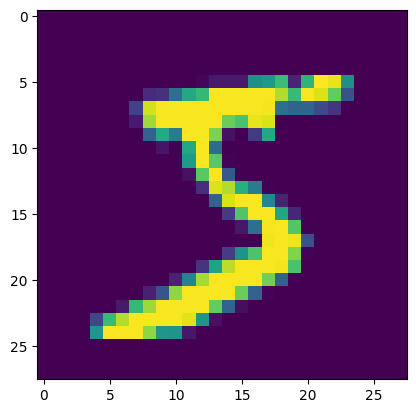

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
28*28

784

In [ ]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
autoencoder = Sequential([encoder,decoder])

In [ ]:
autoencoder.compile(loss='binary_crossentropy',optimizer=SGD(learning_rate=1.5),metrics=['accuracy'])

In [ ]:
autoencoder.fit(X_train,X_train,epochs=5,validation_data=(X_test,X_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.0691 - loss: 0.3001 - val_accuracy: 0.1161 - val_loss: 0.2221
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.1243 - loss: 0.2127 - val_accuracy: 0.1773 - val_loss: 0.1739
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.1833 - loss: 0.1699 - val_accuracy: 0.2019 - val_loss: 0.1511
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.2049 - loss: 0.1510 - val_accuracy: 0.2091 - val_loss: 0.1438
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.2178 - loss: 0.1432 - val_accuracy: 0.2262 - val_loss: 0.1362


In [ ]:
passed_images = autoencoder.predict(X_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Original Image


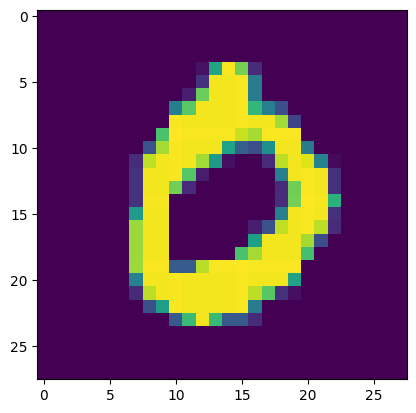

Attempted Reconstruction (after autoencoder)


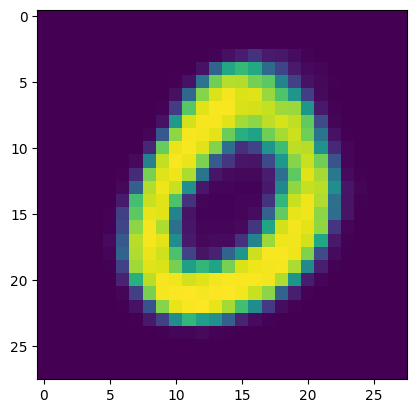

In [ ]:
n = 3

print("Original Image")
plt.imshow(X_test[n])
plt.show()
print("Attempted Reconstruction (after autoencoder)")
plt.imshow(passed_images[n])

In [ ]:
from tensorflow.keras.layers import GaussianNoise

In [ ]:
sample = GaussianNoise(0.2)

In [ ]:
noisey = sample(X_test[:10],training=True)

ORIGINAL


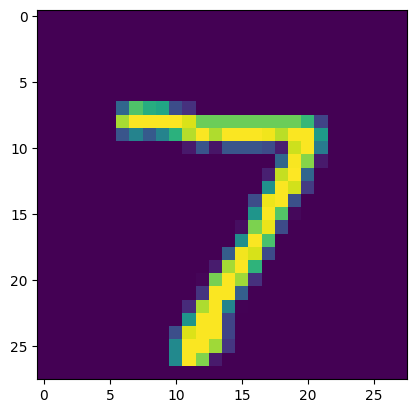

NOISE VERSION


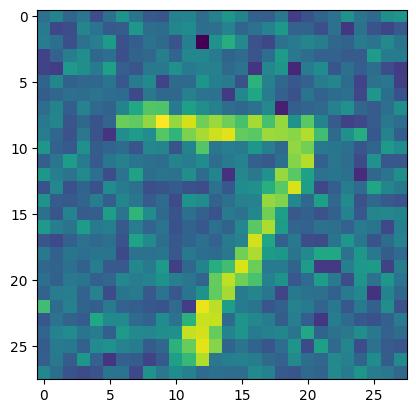

In [ ]:
n = 0
print("ORIGINAL")
plt.imshow(X_test[n])
plt.show()
print("NOISE VERSION")
plt.imshow(noisey[n])
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
noise_remover = Sequential([encoder,decoder])

In [ ]:
noise_remover.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
noise_remover.fit(X_train,X_train,epochs=8)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 18ms/step - accuracy: 0.1281 - loss: 0.2226
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.2239 - loss: 0.1368
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.2395 - loss: 0.1246
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.2479 - loss: 0.1196
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.2534 - loss: 0.1166
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.2587 - loss: 0.1143
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.2644 - loss: 0.1122
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.2684 - loss: 0.1095


In [ ]:
ten_noisey_images = sample(X_test[:10],training=True)

In [ ]:
denoised = noise_remover(ten_noisey_images)

ORIGINAL


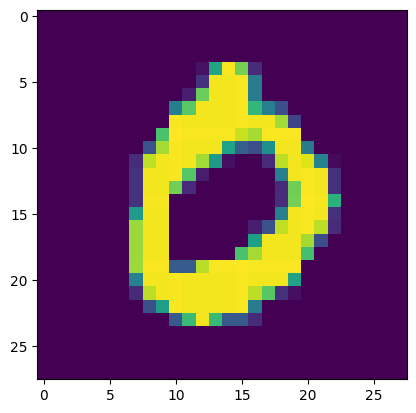

NOISE ADDED IMAGE


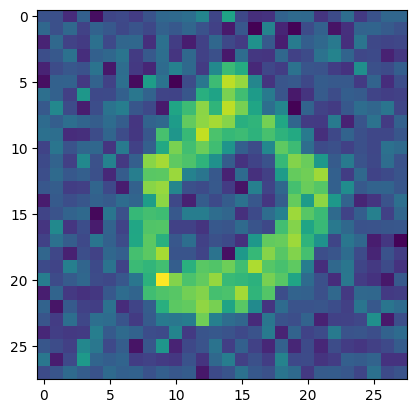

AFTER NOISE REMOVAL FROM AUTOENCODER


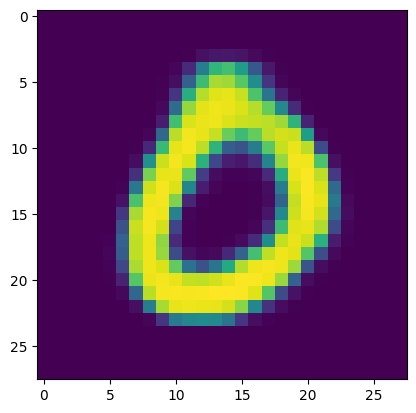

In [ ]:
n = 3
print("ORIGINAL")
plt.imshow(X_test[n])
plt.show()
print("NOISE ADDED IMAGE")
plt.imshow(ten_noisey_images[n])
plt.show()
print("AFTER NOISE REMOVAL FROM AUTOENCODER")
plt.imshow(denoised[n])
plt.show()